# Visualisation of results

In [111]:
import pandas as pd

In [112]:
# load image coordinates
df = pd.read_csv('./data/test/images.txt',  names=["number", "lat", "long", "zoom"])
df.head()

,number,lat,long,zoom
0,25,59.937172,10.807871,NaN
1,26,59.937172,10.810871,NaN
2,27,59.937172,10.813871,NaN
3,28,59.937172,10.816872,NaN
4,29,59.937172,10.819871,NaN


[10.707870864868164, 10.845871292114257, 59.887171936035166, 59.97416854858398]
   number        lat       long  zoom
0      25  59.937172  10.807871   NaN
1      26  59.937172  10.810871   NaN
2      27  59.937172  10.813871   NaN
3      28  59.937172  10.816872   NaN
4      29  59.937172  10.819871   NaN


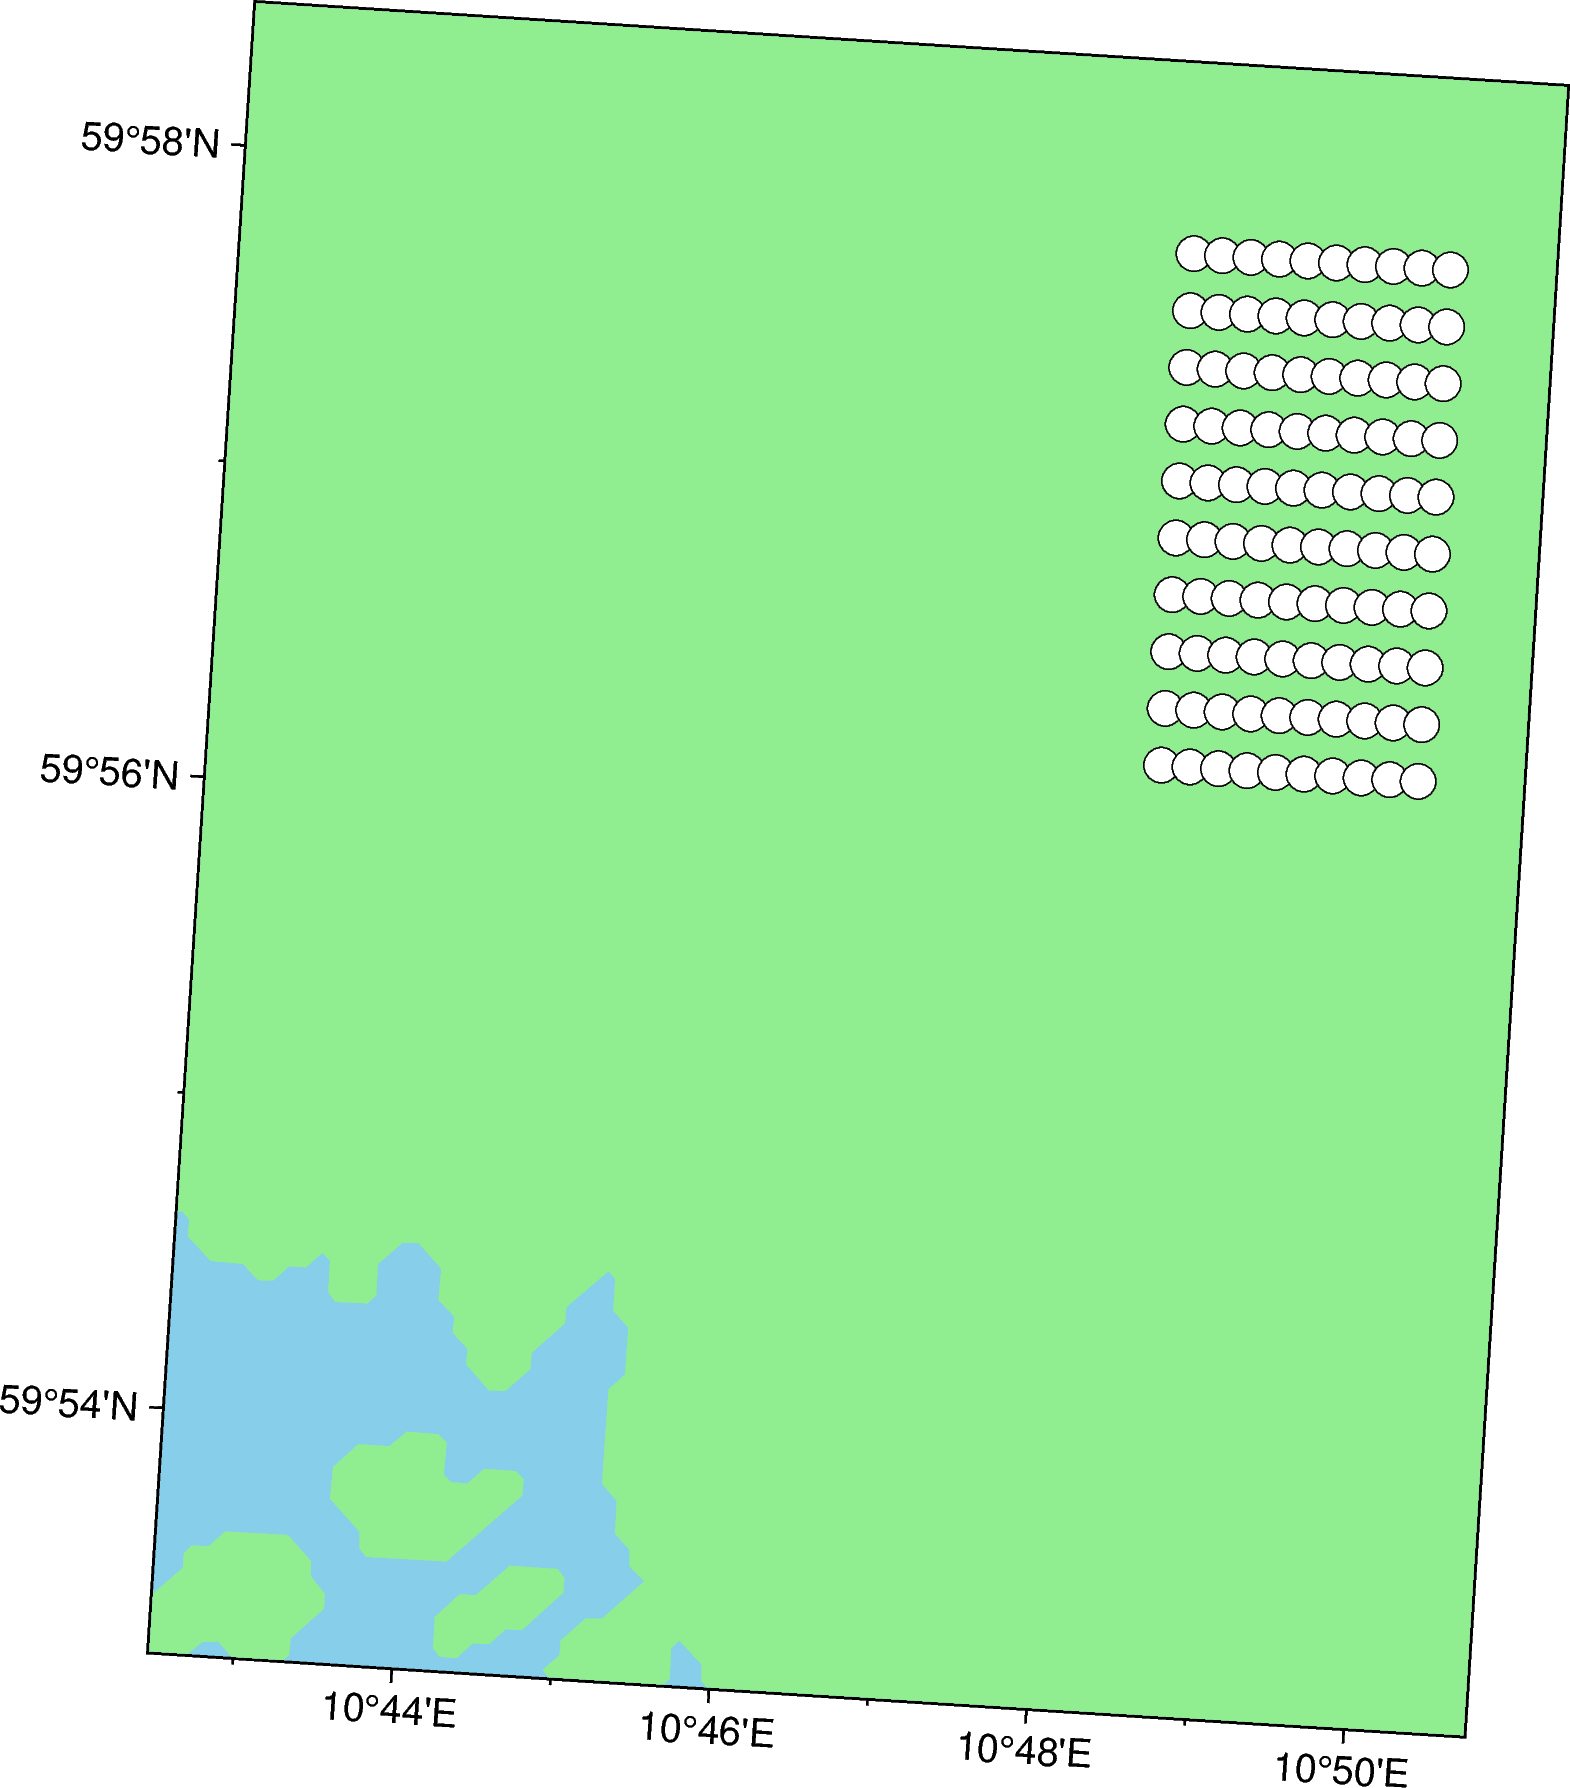

In [113]:
import pygmt

region = [
    df.long.min() - 0.1,
    df.long.max() + 0.011,
    df.lat.min() - 0.05,
    df.lat.max() + 0.01,
]

print(region)
print(df.head())

fig = pygmt.Figure()
fig.basemap(region=region, projection="U33R/12c", frame=True)
fig.coast(land="lightgreen", water="skyblue")
fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
fig.show()
fig.savefig('./figures/map.png', dpi=400)


In [114]:
# Load
import os
from pathlib import Path
import numpy as np

labels_path = Path(r"C:\Users\lug\Documents\Code\trampolines\yolov5\runs\detect\exp8\labels")

text_files = [f for f in os.listdir(labels_path) if f.endswith('.txt')]
print(text_files[:5])

columns = ['Number', 'X', 'Y', 'Width', "Height", 'Filepath']
df = pd.DataFrame(columns = columns)

for tf in text_files:
    df_new = pd.read_csv(labels_path / tf, sep=' ', names=['Number', 'X', 'Y', 'Width', "Height"])
    df_new['Filepath'] = tf
    df = pd.concat([df, df_new])

print(df.head())

['100_gmaps.txt', '101_gmaps.txt', '102_gmaps.txt', '105_gmaps.txt', '106_gmaps.txt']
  Number         X         Y     Width    Height       Filepath
0      0  0.978906   0.81875  0.042188      0.05  100_gmaps.txt
0      0  0.721094  0.873438  0.042188   0.03125  101_gmaps.txt
1      0  0.054688  0.171875  0.040625  0.040625  101_gmaps.txt
2      0  0.522656  0.688281  0.045312  0.048438  101_gmaps.txt
3      0  0.128906  0.140625  0.045312   0.04375  101_gmaps.txt


In [115]:
# Get coords of each image because this data isn't un the detect folder labels
image_data_filepath = Path(r"C:\Users\lug\Documents\Code\trampolines\images\data_2022-02-12\images.txt")

df_coords = pd.read_csv(image_data_filepath,  names=["number", "lat", "long", "zoom"])

df_coords['Filepath'] = df_coords['number'].astype(str) + "_gmaps.txt"
df_coords.head()


,number,lat,long,zoom,Filepath
0,0,59.914173,10.639071,19,0_gmaps.txt
1,1,59.914173,10.642071,19,1_gmaps.txt
2,2,59.914173,10.645071,19,2_gmaps.txt
3,3,59.914173,10.648070,19,3_gmaps.txt
4,4,59.914173,10.651071,19,4_gmaps.txt


In [117]:
df_counts = pd.DataFrame(df['Filepath'].value_counts().reset_index())
df_counts.columns = ['Filepath', 'count']
print(df_counts)

df = pd.merge(df_counts, df_coords, on='Filepath')
df.head()

          Filepath  count
0    135_gmaps.txt      9
1    210_gmaps.txt      6
2    101_gmaps.txt      5
3    211_gmaps.txt      5
4     30_gmaps.txt      4
..             ...    ...
110   44_gmaps.txt      1
111  140_gmaps.txt      1
112  105_gmaps.txt      1
113  106_gmaps.txt      1
114   99_gmaps.txt      1

[115 rows x 2 columns]


,Filepath,count,number,lat,long,zoom
0,135_gmaps.txt,9,135,59.941174,10.639071,19
1,210_gmaps.txt,6,210,59.956173,10.639071,19
2,101_gmaps.txt,5,101,59.932171,10.672071,19
3,211_gmaps.txt,5,211,59.956173,10.642071,19
4,30_gmaps.txt,4,30,59.920174,10.639071,19


[10.539070510864258, 10.692070327758787, 59.867171478271494, 59.96617294311523]
        Filepath  count  number        lat       long  zoom
0  135_gmaps.txt      9     135  59.941174  10.639071    19
1  210_gmaps.txt      6     210  59.956173  10.639071    19
2  101_gmaps.txt      5     101  59.932171  10.672071    19
3  211_gmaps.txt      5     211  59.956173  10.642071    19
4   30_gmaps.txt      4      30  59.920174  10.639071    19


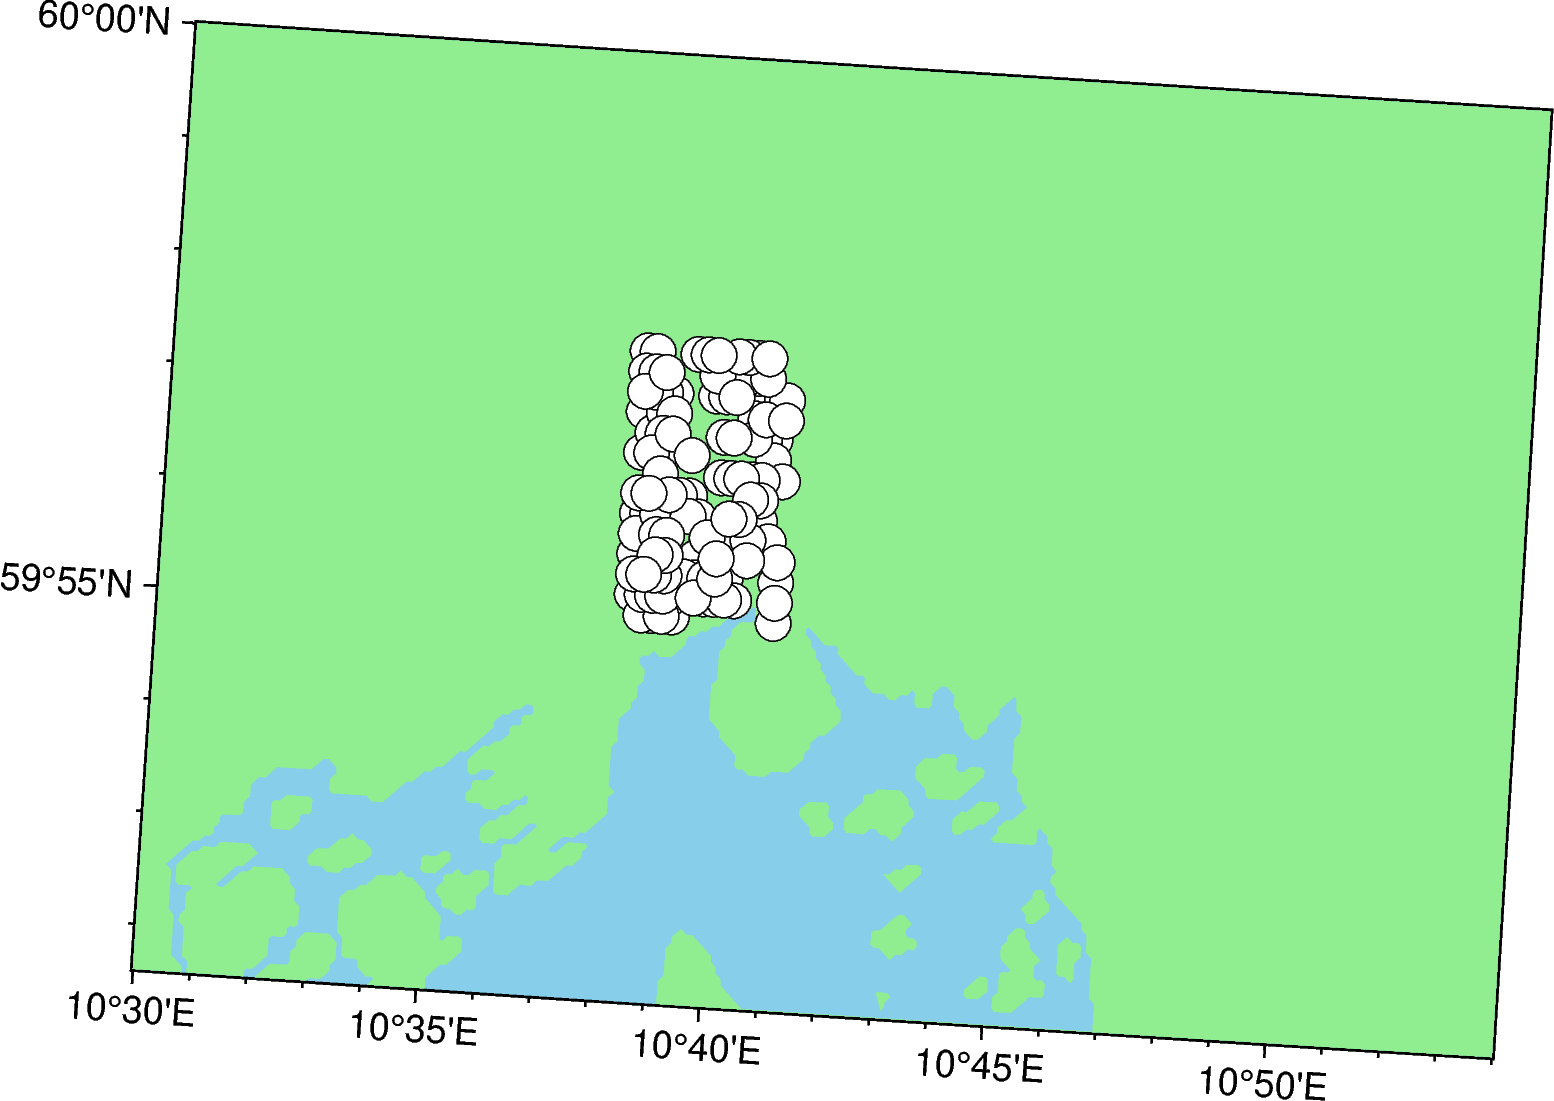

In [122]:
import pygmt

region_oslo = [10.5, 
        10.9,
        59.86,
        60]


print(region)
print(df.head())

fig = pygmt.Figure()
fig.basemap(region=region_oslo, projection="U33R/12c", frame=True)
fig.coast(land="lightgreen", water="skyblue")
fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
fig.show()
fig.savefig('./figures/map.png', dpi=400)
